In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import tensorflow as tf
import pydot
import graphviz 
from numpy import unique
from numpy import argmax
import math
from imblearn.over_sampling import SMOTE

In [55]:
df = pd.read_csv("Dataset/house_dataset(new).csv")

In [56]:
for i in range(df.shape[0]):
    df["Date"][i]=df["Date"][i][0:4]+df["Date"][i][6:-1]

/home/tako/anaconda3/envs/jaewook_p37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
X = np.array(df.iloc[:,1:-1])
y = np.array(df.iloc[:,-1])

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

# Split Data

In [59]:
split_std = 133
y_train = y[:split_std]
y_test = y[split_std:]

# Case 1 : Macro Data

In [60]:
X_macro_train=X[:split_std,:8]
X_macro_test=X[split_std:,:8]

n_features = X_macro_train.shape[1]

# define the keras model
model = Sequential()
model.add(Dense(128, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))

# compile the keras model
model.compile(loss='mse', optimizer='adam')

# fit the keras model on the dataset
model.fit(X_macro_train, y_train, epochs=1000, batch_size=16, verbose=2)

# evaluate on test set
preds = model.predict(X_macro_test)

preds1=np.reshape(preds,(preds.shape[0],))

case1 = np.concatenate((y_train,preds1),axis=0)

tf.keras.backend.clear_session()

print(mean_squared_error(y_test,preds1))

Train on 133 samples
Epoch 1/1000
133/133 - 0s - loss: 7560.9067
Epoch 2/1000
133/133 - 0s - loss: 7022.0793
Epoch 3/1000
133/133 - 0s - loss: 6436.1730
Epoch 4/1000
133/133 - 0s - loss: 5774.4419
Epoch 5/1000
133/133 - 0s - loss: 5039.3198
Epoch 6/1000
133/133 - 0s - loss: 4276.0711
Epoch 7/1000
133/133 - 0s - loss: 3521.8796
Epoch 8/1000
133/133 - 0s - loss: 2807.7367
Epoch 9/1000
133/133 - 0s - loss: 2180.5339
Epoch 10/1000
133/133 - 0s - loss: 1656.7623
Epoch 11/1000
133/133 - 0s - loss: 1234.6662
Epoch 12/1000
133/133 - 0s - loss: 907.7803
Epoch 13/1000
133/133 - 0s - loss: 697.4462
Epoch 14/1000
133/133 - 0s - loss: 555.8992
Epoch 15/1000
133/133 - 0s - loss: 480.3157
Epoch 16/1000
133/133 - 0s - loss: 435.9990
Epoch 17/1000
133/133 - 0s - loss: 401.5409
Epoch 18/1000
133/133 - 0s - loss: 379.3898
Epoch 19/1000
133/133 - 0s - loss: 359.7113
Epoch 20/1000
133/133 - 0s - loss: 343.5445
Epoch 21/1000
133/133 - 0s - loss: 328.4848
Epoch 22/1000
133/133 - 0s - loss: 314.6644
Epoch 23/

# Case 2 : Micro Data

In [61]:
X_micro_train=X[:split_std,8:-1]
X_micro_test=X[split_std:,8:-1]
n_features = X_micro_train.shape[1]

# define the keras model
model = Sequential()
model.add(Dense(128, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))

# compile the keras model
model.compile(loss='mse', optimizer='adam')

# fit the keras model on the dataset
model.fit(X_micro_train, y_train, epochs=1000, batch_size=16,verbose=2)

# evaluate on test set
preds = model.predict(X_micro_test)

preds2=np.reshape(preds,(preds.shape[0],))

case2 = np.concatenate((y_train,preds2),axis=0)

tf.keras.backend.clear_session()

print(mean_squared_error(y_test,preds2))

Train on 133 samples
Epoch 1/1000
133/133 - 0s - loss: 7787.7180
Epoch 2/1000
133/133 - 0s - loss: 7313.0336
Epoch 3/1000
133/133 - 0s - loss: 6806.1752
Epoch 4/1000
133/133 - 0s - loss: 6254.7919
Epoch 5/1000
133/133 - 0s - loss: 5648.4555
Epoch 6/1000
133/133 - 0s - loss: 4958.3155
Epoch 7/1000
133/133 - 0s - loss: 4221.3114
Epoch 8/1000
133/133 - 0s - loss: 3487.7379
Epoch 9/1000
133/133 - 0s - loss: 2806.5952
Epoch 10/1000
133/133 - 0s - loss: 2237.9675
Epoch 11/1000
133/133 - 0s - loss: 1743.7147
Epoch 12/1000
133/133 - 0s - loss: 1413.4190
Epoch 13/1000
133/133 - 0s - loss: 1156.4058
Epoch 14/1000
133/133 - 0s - loss: 971.0073
Epoch 15/1000
133/133 - 0s - loss: 827.5718
Epoch 16/1000
133/133 - 0s - loss: 726.2154
Epoch 17/1000
133/133 - 0s - loss: 654.7449
Epoch 18/1000
133/133 - 0s - loss: 589.9837
Epoch 19/1000
133/133 - 0s - loss: 538.1571
Epoch 20/1000
133/133 - 0s - loss: 501.3881
Epoch 21/1000
133/133 - 0s - loss: 459.7751
Epoch 22/1000
133/133 - 0s - loss: 431.1478
Epoch 2

# Case 3 : Best Choice in previous work

In [62]:
X_train=X[:split_std,[1,2,3,4,5,6,10]]
X_test=X[split_std:,[1,2,3,4,5,6,10]]
n_features = X_train.shape[1]
# define the keras model
model = Sequential()
model.add(Dense(128, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))

# compile the keras model
model.compile(loss='mse', optimizer='adam')

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=1000, batch_size=16, verbose=2)

# evaluate on test set
preds = model.predict(X_test)
preds3=np.reshape(preds,(preds.shape[0],))

case3 = np.concatenate((y_train,preds3),axis=0)

tf.keras.backend.clear_session()

print(mean_squared_error(y_test,preds3))

Train on 133 samples
Epoch 1/1000
133/133 - 0s - loss: 7574.4005
Epoch 2/1000
133/133 - 0s - loss: 7027.3209
Epoch 3/1000
133/133 - 0s - loss: 6478.1728
Epoch 4/1000
133/133 - 0s - loss: 5870.7001
Epoch 5/1000
133/133 - 0s - loss: 5199.1842
Epoch 6/1000
133/133 - 0s - loss: 4506.1073
Epoch 7/1000
133/133 - 0s - loss: 3804.7020
Epoch 8/1000
133/133 - 0s - loss: 3112.7415
Epoch 9/1000
133/133 - 0s - loss: 2486.6369
Epoch 10/1000
133/133 - 0s - loss: 1929.6793
Epoch 11/1000
133/133 - 0s - loss: 1475.3902
Epoch 12/1000
133/133 - 0s - loss: 1125.5153
Epoch 13/1000
133/133 - 0s - loss: 856.2770
Epoch 14/1000
133/133 - 0s - loss: 682.3353
Epoch 15/1000
133/133 - 0s - loss: 573.3820
Epoch 16/1000
133/133 - 0s - loss: 495.7506
Epoch 17/1000
133/133 - 0s - loss: 446.7476
Epoch 18/1000
133/133 - 0s - loss: 407.1369
Epoch 19/1000
133/133 - 0s - loss: 369.9040
Epoch 20/1000
133/133 - 0s - loss: 338.0628
Epoch 21/1000
133/133 - 0s - loss: 307.7854
Epoch 22/1000
133/133 - 0s - loss: 281.9303
Epoch 23

# Case 4 : Every Feature

In [63]:
X_train=X[:split_std,]
X_test=X[split_std:,]
n_features = X_train.shape[1]
# define the keras model
model = Sequential()
model.add(Dense(128, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))

# compile the keras model
model.compile(loss='mse', optimizer='adam')

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=1000, batch_size=16, verbose=2)

# evaluate on test set
preds = model.predict(X_test)
preds4=np.reshape(preds,(preds.shape[0],))

case4 = np.concatenate((y_train,preds4),axis=0)

tf.keras.backend.clear_session()

print(mean_squared_error(y_test,preds4))

Train on 133 samples
Epoch 1/1000
133/133 - 0s - loss: 7679.5518
Epoch 2/1000
133/133 - 0s - loss: 7113.3501
Epoch 3/1000
133/133 - 0s - loss: 6535.8356
Epoch 4/1000
133/133 - 0s - loss: 5877.8245
Epoch 5/1000
133/133 - 0s - loss: 5139.0772
Epoch 6/1000
133/133 - 0s - loss: 4315.2673
Epoch 7/1000
133/133 - 0s - loss: 3479.4076
Epoch 8/1000
133/133 - 0s - loss: 2653.9009
Epoch 9/1000
133/133 - 0s - loss: 1915.1032
Epoch 10/1000
133/133 - 0s - loss: 1324.4060
Epoch 11/1000
133/133 - 0s - loss: 917.1803
Epoch 12/1000
133/133 - 0s - loss: 661.7717
Epoch 13/1000
133/133 - 0s - loss: 517.8929
Epoch 14/1000
133/133 - 0s - loss: 442.2370
Epoch 15/1000
133/133 - 0s - loss: 397.2950
Epoch 16/1000
133/133 - 0s - loss: 353.7832
Epoch 17/1000
133/133 - 0s - loss: 326.3047
Epoch 18/1000
133/133 - 0s - loss: 299.6689
Epoch 19/1000
133/133 - 0s - loss: 278.6158
Epoch 20/1000
133/133 - 0s - loss: 260.7240
Epoch 21/1000
133/133 - 0s - loss: 244.2774
Epoch 22/1000
133/133 - 0s - loss: 229.7519
Epoch 23/1

# Case 5 : Feature selection with Best 10 MI feature

In [64]:
from sklearn.feature_selection import mutual_info_regression as mi
arr=mi(X,y)
ll=pd.DataFrame(arr).transpose()
ll

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.157112,1.416137,1.043794,0.935058,1.635319,0.842664,0.515923,0.165472,1.656569,0.185111,2.065163,1.357707,1.046804,0.23738,0.282114


In [65]:
np.argsort(arr, axis=-1, kind='quicksort', order=None)

array([ 0,  7,  9, 13, 14,  6,  5,  3,  2, 12, 11,  1,  4,  8, 10])

In [66]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression as mi
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
X_new = SelectKBest(mi, k=4).fit_transform(X, y)

X_train=X_new[:split_std,]
X_test=X_new[split_std:,]

n_features = X_train.shape[1]
# define the keras model
model = Sequential()
model.add(Dense(128, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# compile the keras model
model.compile(loss='mse', optimizer='adam')

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=1000, batch_size=16, verbose=2)

# evaluate on test set
preds = model.predict(X_test)
preds5=np.reshape(preds,(preds.shape[0],))

case5 = np.concatenate((y_train,preds5),axis=0)

tf.keras.backend.clear_session()

print(mean_squared_error(y_test,preds5))

Train on 133 samples
Epoch 1/1000
133/133 - 0s - loss: 7633.1025
Epoch 2/1000
133/133 - 0s - loss: 7299.6829
Epoch 3/1000
133/133 - 0s - loss: 6917.4775
Epoch 4/1000
133/133 - 0s - loss: 6555.7583
Epoch 5/1000
133/133 - 0s - loss: 6133.4302
Epoch 6/1000
133/133 - 0s - loss: 5547.8640
Epoch 7/1000
133/133 - 0s - loss: 5003.1431
Epoch 8/1000
133/133 - 0s - loss: 4311.5561
Epoch 9/1000
133/133 - 0s - loss: 3745.8959
Epoch 10/1000
133/133 - 0s - loss: 3242.9000
Epoch 11/1000
133/133 - 0s - loss: 2790.6664
Epoch 12/1000
133/133 - 0s - loss: 2334.0178
Epoch 13/1000
133/133 - 0s - loss: 1830.7275
Epoch 14/1000
133/133 - 0s - loss: 1570.5926
Epoch 15/1000
133/133 - 0s - loss: 1491.9479
Epoch 16/1000
133/133 - 0s - loss: 1156.1341
Epoch 17/1000
133/133 - 0s - loss: 1096.8815
Epoch 18/1000
133/133 - 0s - loss: 1022.5527
Epoch 19/1000
133/133 - 0s - loss: 959.9945
Epoch 20/1000
133/133 - 0s - loss: 724.5887
Epoch 21/1000
133/133 - 0s - loss: 1043.5940
Epoch 22/1000
133/133 - 0s - loss: 673.5633
E

# Case 6 : 차원 축소

In [67]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=4)
# X_new=pca.fit_transform(X)

# X_train=X_new[:split_std,]
# X_test=X_new[split_std:,]

# n_features = X_train.shape[1]
# # define the keras model
# model = Sequential()
# model.add(Dense(128, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='linear'))

# # compile the keras model
# model.compile(loss='mse', optimizer='adam')

# # fit the keras model on the dataset
# model.fit(X_train, y_train, epochs=1000, batch_size=16, verbose=2)

# # evaluate on test set
# preds = model.predict(X_test)
# preds6=np.reshape(preds,(preds.shape[0],))

# case6 = np.concatenate((y_train,preds6),axis=0)

# tf.keras.backend.clear_session()

# Visualization

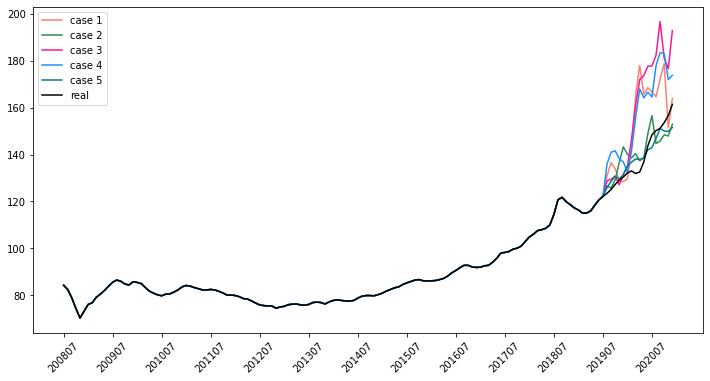

In [68]:
std=120
plt.figure(figsize=(12, 6))

x_date = df.iloc[:,0]
plt.plot(x_date,case1, color="salmon")
plt.plot(x_date,case2, color="seagreen")
plt.plot(x_date,case3, color="deeppink")
plt.plot(x_date,case4, color="dodgerblue")
plt.plot(x_date,case5, color="teal")
plt.plot(x_date,y, color="black")
plt.legend(['case 1','case 2','case 3','case 4','case 5', 'real'])
plt.xticks(ticks=x_date, rotation=45)
plt.locator_params(axis='x', nbins=x_date.shape[0]/12)
plt.show()

# Save Data

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def Eval(y_true,y_pred):
    mae=mean_absolute_error(y_true,y_pred)
    rmse=mean_squared_error(y_true, y_pred)**0.5
    return mae,rmse

In [70]:
arr=[Eval(y_test,preds1),
     Eval(y_test,preds2),
     Eval(y_test,preds3),
    Eval(y_test,preds4),
    Eval(y_test,preds5)]

In [71]:
buf=np.zeros((1,10))
for i in range(len(arr)):
    buf[0][i*2]=arr[i][0]
    buf[0][i*2+1]=arr[i][1]

In [72]:
result=pd.DataFrame(buf)
result.columns=['CASE_1_MAE','CASE_1_RMSE',
                'CASE_2_MAE','CASE_2_RMSE',
               'CASE_3_MAE','CASE_3_RMSE',
               'CASE_4_MAE','CASE_4_RMSE',
               'CASE_5_MAE','CASE_5_RMSE',]
result

,CASE_1_MAE,CASE_1_RMSE,CASE_2_MAE,CASE_2_RMSE,CASE_3_MAE,CASE_3_RMSE,CASE_4_MAE,CASE_4_RMSE,CASE_5_MAE,CASE_5_RMSE
0,15.259936,19.736548,5.970753,6.679929,21.049211,25.743933,18.243917,20.637242,3.632328,4.369306


In [73]:
import os
if not os.path.exists('Result/result_baseline.csv'):
    result.to_csv('Result/result_baseline.csv', index=False, mode='w', encoding='utf-8-sig')
else:
    result.to_csv('Result/result_baseline.csv', index=False, mode='a', encoding='utf-8-sig', header=False)